In [1]:
import sympy as sp
import matplotlib.pyplot as plt
import math
import itertools as it

# Problem 1

## Part (a)

To find the general solution, we first need to solve the characteristic equation below:

In [2]:
r = sp.Symbol('r')
equation = sp.Eq(r**4 + (2 - 2*sp.sqrt(3))*r**3 + (6 - 4*sp.sqrt(3))*r**2 + (8 - 4*sp.sqrt(3))*r + 8, 0)
equation

Eq(r**4 + r**3*(2 - 2*sqrt(3)) + r**2*(6 - 4*sqrt(3)) + r*(8 - 4*sqrt(3)) + 8, 0)

Solving the equation yields:

In [3]:
roots = sp.solve(equation, r)
sp.Eq(sp.Matrix([sp.Symbol(f'r_{i}') for i in range(1, 5)]), sp.Matrix(roots))

Eq(Matrix([
[r_1],
[r_2],
[r_3],
[r_4]]), Matrix([
[     -1 - I],
[     -1 + I],
[sqrt(3) - I],
[sqrt(3) + I]]))

In [4]:
theta1 = sp.arg(roots[0])
abs1 = abs(roots[0])
theta2 = sp.arg(roots[2])
abs2 = abs(roots[2])

n = sp.Symbol('n')
solutions = [
    abs1**n*sp.cos(n*theta1),
    abs1**n*sp.sin(n*theta1),
    abs2**n*sp.cos(n*theta2),
    abs2**n*sp.sin(n*theta2),
]
constants = [sp.Symbol(f'c_{i}') for i in range(1, 5)]
general_solution = sum(c*sol for c, sol in zip(constants, solutions))

So the general equation is:

In [5]:
sp.Eq(sp.Symbol('x_n'), general_solution)

Eq(x_n, 2**(n/2)*c_1*cos(3*pi*n/4) - 2**(n/2)*c_2*sin(3*pi*n/4) + 2**n*c_3*cos(pi*n/6) - 2**n*c_4*sin(pi*n/6))

## Part (b)

In [6]:
w = sp.Matrix([
    solutions,
    [exp.subs(n, n + 1) for exp in solutions],
    [exp.subs(n, n + 2) for exp in solutions],
    [exp.subs(n, n + 3) for exp in solutions],
])
w

Matrix([
[              2**(n/2)*cos(3*pi*n/4),               -2**(n/2)*sin(3*pi*n/4),               2**n*cos(pi*n/6),               -2**n*sin(pi*n/6)],
[2**(n/2 + 1/2)*cos(pi*(3*n/4 + 3/4)), -2**(n/2 + 1/2)*sin(pi*(3*n/4 + 3/4)), 2**(n + 1)*cos(pi*(n/6 + 1/6)), -2**(n + 1)*sin(pi*(n/6 + 1/6))],
[  2**(n/2 + 1)*cos(pi*(3*n/4 + 3/2)),   -2**(n/2 + 1)*sin(pi*(3*n/4 + 3/2)), 2**(n + 2)*cos(pi*(n/6 + 1/3)), -2**(n + 2)*sin(pi*(n/6 + 1/3))],
[2**(n/2 + 3/2)*cos(pi*(3*n/4 + 9/4)), -2**(n/2 + 3/2)*sin(pi*(3*n/4 + 9/4)), 2**(n + 3)*cos(pi*(n/6 + 1/2)), -2**(n + 3)*sin(pi*(n/6 + 1/2))]])

In [7]:
sp.simplify(w.det())

2**(3*n + 3)*(3*sqrt(3) + 11/2)

$$
2^{3n + 3}(3\sqrt{3} + \frac{11}{2}) \neq 0
$$
So, the four fundamental solutions of (1) are linearly independent

## Part (c)

In [8]:
equations = [sp.Eq(general_solution.subs(n, i), sp.Rational(1, 4))
             for i in range(0, -4, -1)]

By solving the 4 equations below:

In [9]:
equations[0]

Eq(c_1 + c_3, 1/4)

In [10]:
equations[1]

Eq(-c_1/2 + c_2/2 + sqrt(3)*c_3/4 + c_4/4, 1/4)

In [11]:
equations[2]

Eq(-c_2/2 + c_3/8 + sqrt(3)*c_4/8, 1/4)

In [12]:
equations[3]

Eq(c_1/4 + c_2/4 + c_4/8, 1/4)

We get:

In [13]:
solved_constants = sp.solve(equations, constants)
sp.Eq(sp.Matrix(constants), sp.Matrix(list(solved_constants.values())))

Eq(Matrix([
[c_1],
[c_2],
[c_3],
[c_4]]), Matrix([
[                1/4],
[-17/4 + 5*sqrt(3)/2],
[                  0],
[     10 - 5*sqrt(3)]]))

So, the unique solution is:

In [14]:
for c, sol in solved_constants.items():
    general_solution = general_solution.subs(c, sol)
general_solution = sp.simplify(general_solution)
sp.Eq(sp.Symbol('x_n'), general_solution)

Eq(x_n, -5*2**n*(2 - sqrt(3))*sin(pi*n/6) + 2**(n/2 - 2)*(17 - 10*sqrt(3))*sin(3*pi*n/4) + 2**(n/2 - 2)*cos(3*pi*n/4))

## Part (d)

Plotting for $n = 1 \ldots 20$ we get:

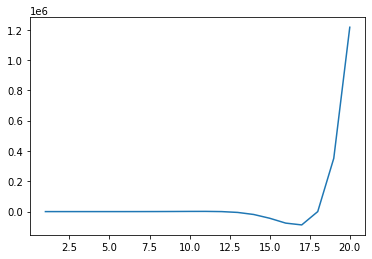

In [15]:
fig, ax = plt.subplots()
_ = ax.plot([i for i in range(1, 21)], [general_solution.subs(n, i) for i in range(1, 21)])

Plotting for $n = 1 \ldots 40$ we get:

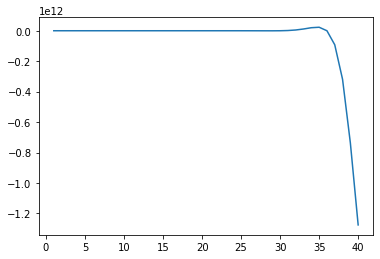

In [16]:
fig, ax = plt.subplots()
_ = ax.plot([i for i in range(1, 41)], [general_solution.subs(n, i) for i in range(1, 41)])

Plotting for $n = 1 \ldots 60$ we get:

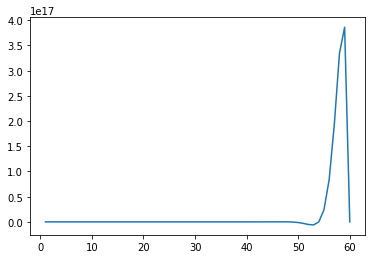

In [17]:
fig, ax = plt.subplots()
_ = ax.plot([i for i in range(1, 61)], [general_solution.subs(n, i) for i in range(1, 61)])

# Problem 2

In [18]:
a = sp.Function("a")
f = n*a(n+2) - (n+1)*a(n+1) + a(n)
sp.rsolve(f, a(n))

C0

However, we know that the result above is wrong, and according to WolframAlpha, the homogenous solution is:

In [19]:
constants = list(sp.symbols('c_1, c_2'))
solutions = [sp.E**0, sp.E * sp.uppergamma(n-1, 1) / sp.gamma(n-1)] # I used sp.E**0 instead of 1 so that 1 is treated as an expression, and not as an integer
homogeous_solution = sum(c*sol for c, sol in zip(constants, solutions))
homogeous_solution

c_1 + E*c_2*uppergamma(n - 1, 1)/gamma(n - 1)

To get the particular solution, we are going to use variation of parameters.

First, let's compute the Wronskian.

In [20]:
w = sp.Matrix([
    solutions,
    [exp.subs(n, n + 1) for exp in solutions],
])
w

Matrix([
[1, E*uppergamma(n - 1, 1)/gamma(n - 1)],
[1,         E*uppergamma(n, 1)/gamma(n)]])

In [21]:
w = w.det()
w

-E*uppergamma(n - 1, 1)/gamma(n - 1) + E*uppergamma(n, 1)/gamma(n)

Now, we can get the particular solution

In [22]:
f = 1 / ((n + 1) * n)
j = sp.Symbol('j')
particular_solution = solutions[1] * sp.Sum(solutions[0].subs(n, j + 1) * f.subs(n, j) / w.subs(n, j + 1), (j, 1, n - 1)) - \
                      solutions[0] * sp.Sum(solutions[1].subs(n, j + 1) * f.subs(n, j) / w.subs(n, j + 1), (j, 1, n - 1))
particular_solution

-Sum(E*uppergamma(j, 1)/(j*(j + 1)*(E*uppergamma(j + 1, 1)/gamma(j + 1) - E*uppergamma(j, 1)/gamma(j))*gamma(j)), (j, 1, n - 1)) + E*uppergamma(n - 1, 1)*Sum(1/(j*(j + 1)*(E*uppergamma(j + 1, 1)/gamma(j + 1) - E*uppergamma(j, 1)/gamma(j))), (j, 1, n - 1))/gamma(n - 1)

Therefore, the general solution is:

In [23]:
general_solution = homogeous_solution + particular_solution
general_solution

c_1 + E*c_2*uppergamma(n - 1, 1)/gamma(n - 1) - Sum(E*uppergamma(j, 1)/(j*(j + 1)*(E*uppergamma(j + 1, 1)/gamma(j + 1) - E*uppergamma(j, 1)/gamma(j))*gamma(j)), (j, 1, n - 1)) + E*uppergamma(n - 1, 1)*Sum(1/(j*(j + 1)*(E*uppergamma(j + 1, 1)/gamma(j + 1) - E*uppergamma(j, 1)/gamma(j))), (j, 1, n - 1))/gamma(n - 1)

# Problem 3

## Part (a)

In [24]:
y = sp.Function('y')
x = sp.Symbol('x', real=True)
diffeq = sp.Eq(y(x).diff(x), sp.E**(x - y(x)) / (1 + sp.E**x)**2)
diffeq

Eq(Derivative(y(x), x), exp(x - y(x))/(exp(x) + 1)**2)

In [25]:
y = sp.Symbol('y', real=True)
dy, dx, c = sp.symbols('dy dx c')
sp.Eq(sp.E**y * dy, sp.E**x / (sp.E**x + 1)**2 * dx)

Eq(dy*exp(y), dx*exp(x)/(exp(x) + 1)**2)

It is a seperable equation so we can integrate both sides.

In [26]:
integral1 = sp.integrate(sp.E**y, y)
integral2 = sp.integrate(sp.E**x / (sp.E**x + 1)**2, x)
sp.Eq(integral1, integral2 + c)

Eq(exp(y), c - 1/(exp(x) + 1))

Take ln of both sides (sympy uses `log` notation instead of `ln`)

In [27]:
eq = sp.Eq(sp.ln(integral1), sp.ln(integral2 + c))
eq

Eq(y, log(c - 1/(exp(x) + 1)))

In [28]:
init_eq = eq.subs(y, 1).subs(x, 0)
init_eq

Eq(1, log(c - 1/2))

In [29]:
solutions = sp.solve(init_eq, c)
sp.Eq(c, solutions[0])

Eq(c, 1/2 + E)

The exact solution is:

In [30]:
eq = eq.subs(c, solutions[0])
eq

Eq(y, log(1/2 + E - 1/(exp(x) + 1)))

## Part (b)

In [31]:
y = sp.Function('y')
taylor_coef = [1, sp.E**(x - y(x)) / (1 + sp.E**x)**2]
while len(taylor_coef) < 5:
    taylor_coef.append(sp.diff(taylor_coef[-1], x))

sp.Matrix(taylor_coef)

Matrix([
[                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         1],
[                                                                                                                                                                                                                                                                                                                                                                                                

In [32]:
subs = [(x, 0), (y(x), 1)]
for i in range(1, len(taylor_coef)):
    taylor_coef[i] = sp.simplify(taylor_coef[i].subs(reversed(subs)))
    subs.append((sp.diff(subs[-1][0], x), taylor_coef[i]))
    
taylor_polynomials = list(it.accumulate([coef/math.factorial(i) * x**i if i else coef for i, coef in enumerate(taylor_coef)]))
sp.Matrix(taylor_polynomials)

Matrix([
[                                                                                                       1],
[                                                                                         x*exp(-1)/4 + 1],
[                                                                      -x**2*exp(-2)/32 + x*exp(-1)/4 + 1],
[                                     x**3*(1 - 4*exp(2))*exp(-3)/192 - x**2*exp(-2)/32 + x*exp(-1)/4 + 1],
[x**4*(-3 + 16*exp(2))*exp(-4)/3072 + x**3*(1 - 4*exp(2))*exp(-3)/192 - x**2*exp(-2)/32 + x*exp(-1)/4 + 1]])

## Part (c)